In [2]:
#Marked Assignment 1
#1

#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

whr_data = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')
print(whr_data.head(10))

#The number of rows and columns in the dataset
print("The number of rows and columns are:")
rows,column = whr_data.shape
print(f"Rows: {rows}")
print(f"Columns: {column}")

#Listing all the columns with their data types
print("The columns with their data types are:\n ",whr_data.dtypes)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [8]:
mean_score  = np.mean(whr_data['score'])
median_score = np.median(whr_data['score'])
std_score = np.std(whr_data['score'])

print(f"The mean of the score column is:{mean_score:.2f}")
print(f"The median of the score column is:{median_score:.2f}")
print(f"The standard deviation of the score column is:{std_score:.2f}")


#Country with highest happiness score
highest_score = whr_data['score'].max()
highest_score_country = whr_data.loc[whr_data['score'] == highest_score,['Country name']].values[0][0]
print(f"The highest happiness score is:{highest_score} of {highest_score_country}" )

#Lowest happiness score
lowest_score = whr_data['score'].min()
lowest_score_country = whr_data.loc[whr_data['score'] == lowest_score,['Country name']].values[0][0]
print(f"The lowest happiness score is:{lowest_score} of {lowest_score_country}" )


The mean of the score column is:5.53
The median of the score column is:5.79
The standard deviation of the score column is:1.17
The highest happiness score is:7.741 of Finland
The lowest happiness score is:1.721 of Afghanistan


In [9]:
#-------------------Missing Values----------------
#Checking Missing Values
print(whr_data.isnull().sum())

#Handling the null values
whr_data.dropna(inplace = True)
print(whr_data.isnull().sum())

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64
Country name                    0
score                           0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64


In [10]:
filter_by_score = whr_data.loc[whr_data['score'] > 7.5]

#Sort by GDP per Capita in descending order
order_by_gdp =filter_by_score.sort_values(by='Log GDP per capita', ascending=False)
print(order_by_gdp.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [11]:
scores=[]
for row in whr_data['score']:
  if row > 6:
    scores.append('High')
  elif 4<=row<=6:
    scores.append('Medium')
  elif row < 4:
    scores.append('Low')
whr_data['Happiness_Category'] = scores
print(whr_data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

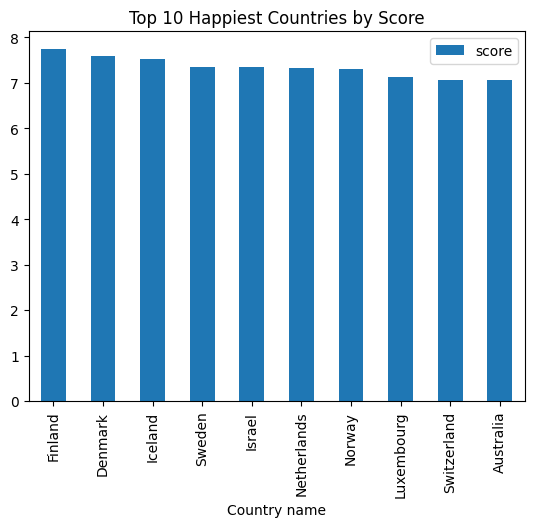

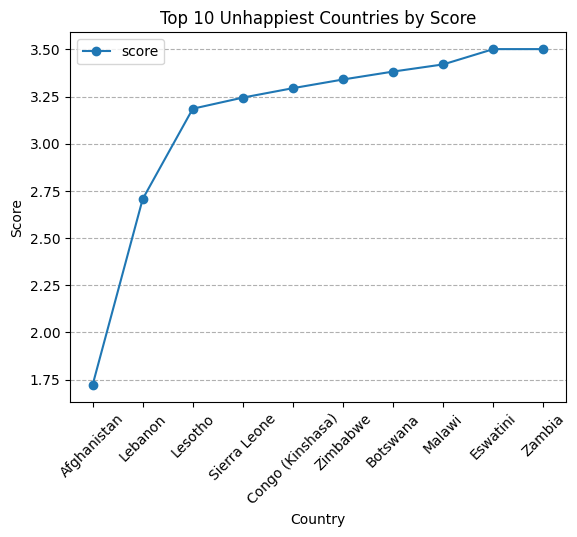

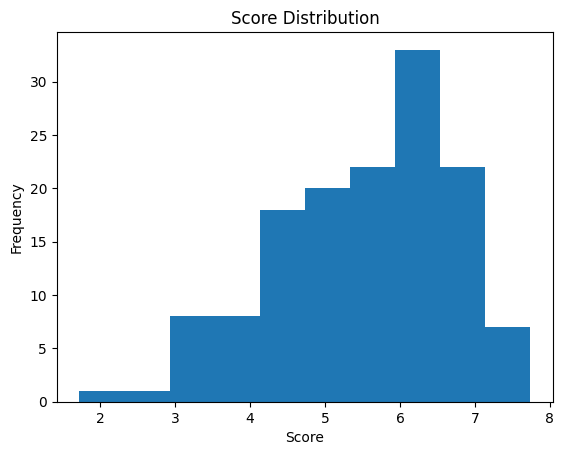

Text(0, 0.5, 'Score')

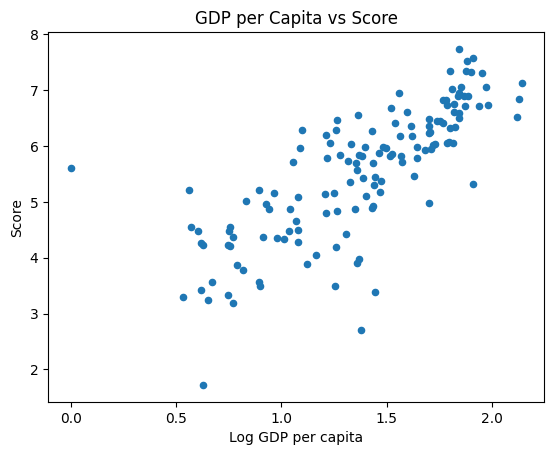

In [12]:
happiest_countries = whr_data.sort_values(by='score', ascending=False).head(10)
happiest_countries.plot(kind='bar', x='Country name', y='score', title='Top 10 Happiest Countries by Score')

#Plotting the top 10 unhappiest countries by Score in a Line graph
unhappiest_countries = whr_data.sort_values(by='score', ascending=True).head(10)
countries_plot=unhappiest_countries.plot(kind='line', x='Country name', y='score',marker='o', title='Top 10 Unhappiest Countries by Score')
countries_plot.set_xticks(range(len(unhappiest_countries)))
countries_plot.set_xticklabels(unhappiest_countries['Country name'],rotation=45)
countries_plot.set_xlabel('Country')
countries_plot.set_ylabel('Score')
countries_plot.grid(axis='y', linestyle='--')
plt.show()

#A histogram to show the Score column and its distribution
hist_plot = whr_data['score'].plot(kind='hist', title='Score Distribution')
hist_plot.set_xlabel('Score')
hist_plot.set_ylabel('Frequency')
plt.show()

#A scatter plot between GDP per Capita and Score
scatter_plot = whr_data.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score')
scatter_plot.set_xlabel('Log GDP per capita')
scatter_plot.set_ylabel('Score')

In [15]:
south_asian_countires = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

#Filter the matching data from the list
filter_data_south_asian = whr_data[whr_data['Country name'].isin(south_asian_countires)]

#Save in a new dataset
south_asian_countries_csv = filter_data_south_asian.to_csv('south_asian_countries.csv', index=False)

# New Section

  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
0                      0.115                1.783             Medium   
1                      0.074                1.907       

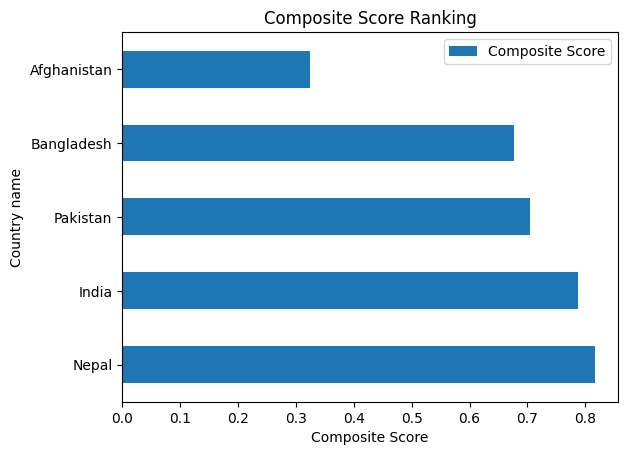

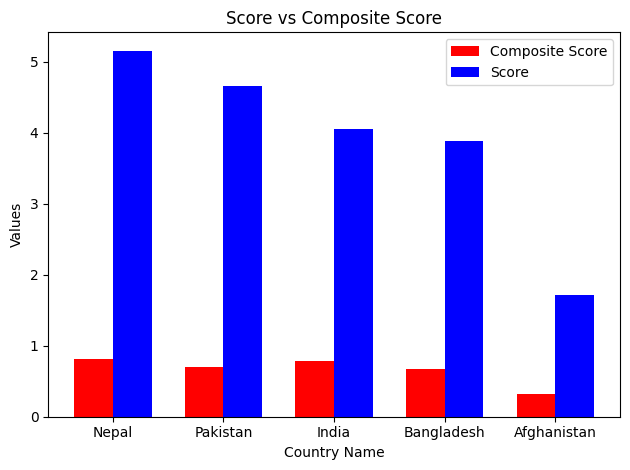

In [38]:
south_asia = pd.read_csv('/content/south_asian_countries.csv')

south_asia['Composite Score'] = 0.4 * south_asia['Log GDP per capita'] + 0.3 * south_asia['Social support'] + 0.3 * south_asia['Healthy life expectancy']
print(south_asia.head(10))

rank_composite_score = south_asia.sort_values(by='Composite Score', ascending=False)

bar_plot = rank_composite_score.plot(kind='barh', x='Country name', y='Composite Score',title='Composite Score Ranking')
plt.xlabel("Composite Score")
plt.show()

x = range(len(south_asia))
width = 0.35
plt.bar(x, south_asia['Composite Score'], width, label='Composite Score', color='red')

plt.bar([p + width for p in x], south_asia['score'], width, label='Score', color='blue')
plt.title('Score vs Composite Score')
plt.xlabel('Country Name')
plt.ylabel('Values')
plt.xticks([p + width / 2 for p in x], south_asia['Country name'])
plt.tight_layout()
plt.legend()
plt.show()

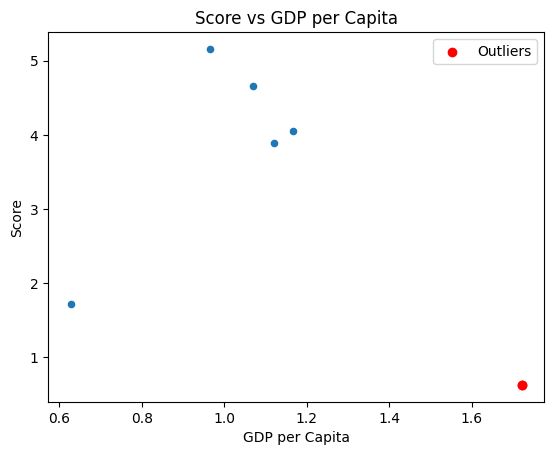

In [17]:
def find_outliers(column_name):
    Q1 = south_asia[column_name].quantile(0.25)
    Q3 = south_asia[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia[(south_asia[column_name] < lower_bound) | (south_asia[column_name] > upper_bound)]
south_asia_plot = south_asia.plot(kind='scatter', x='Log GDP per capita', y='score', title='Score vs GDP per Capita')
south_asia_plot.set_xlabel('GDP per Capita')
south_asia_plot.set_ylabel('Score')

outliers = pd.concat([find_outliers('score'), find_outliers('Log GDP per capita')])
south_asia_plot.scatter(outliers['score'], outliers['Log GDP per capita'], color='red', label='Outliers')
south_asia_plot.legend()
plt.show()

The correlation between Freedom to make life choices and score is: 0.80
The correlation between Generosity and score is: 0.88


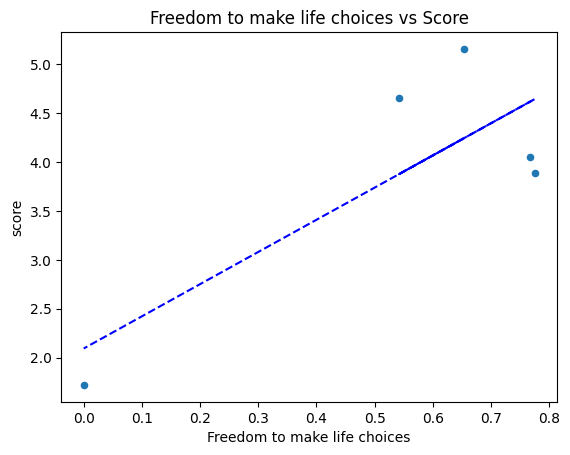

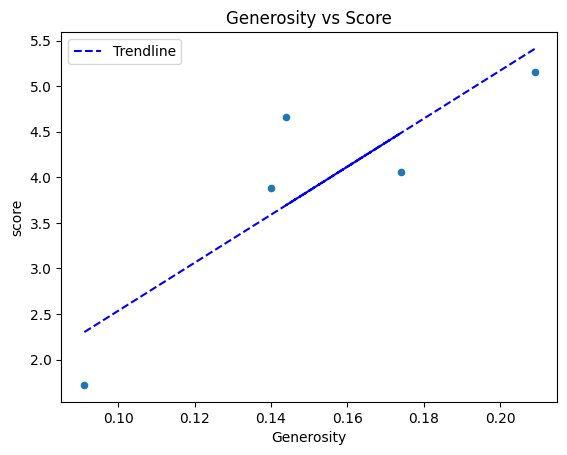

In [27]:
corr_life_choices = south_asia['Freedom to make life choices'].corr(south_asia['score'],method='pearson')
corr_generosity = south_asia['Generosity'].corr(south_asia['score'],method = 'pearson')
print(f"The correlation between Freedom to make life choices and score is: {corr_life_choices:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity:.2f}")

life_choices_plot = south_asia.plot(kind='scatter', x='Freedom to make life choices', y='score', title='Freedom to make life choices vs Score')\

life_choices_z = np.polyfit(south_asia['Freedom to make life choices'], south_asia['score'], 1)
life_choices_p = np.poly1d(life_choices_z)
life_choices_plot.plot(south_asia['Freedom to make life choices'], life_choices_p(south_asia['Freedom to make life choices']), color='blue', linestyle='--', label='Trendline')

generosity_plot = south_asia.plot(kind='scatter', x='Generosity', y='score', title='Generosity vs Score')

generosity_z = np.polyfit(south_asia['Generosity'], south_asia['score'], 1)
generosity_p = np.poly1d(generosity_z)
generosity_plot.plot(south_asia['Generosity'], generosity_p(south_asia['Generosity']), color='blue', linestyle='--', label='Trendline')

plt.legend()

  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628           0.000   
3   Bangladesh  3.886               1.122           0.249   
2        India  4.054               1.166           0.653   
1     Pakistan  4.657               1.069           0.600   
0        Nepal  5.158               0.965           0.990   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                         0.000       0.091   
3                    0.513                         0.775       0.140   
2                    0.417                         0.767       0.174   
1                    0.321                         0.542       0.144   
0                    0.443                         0.653       0.209   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
4                      0.088                0.672                Low   
3                      0.167                0.919       

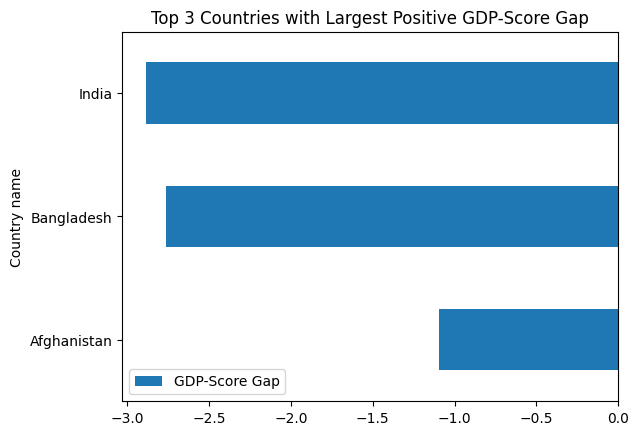

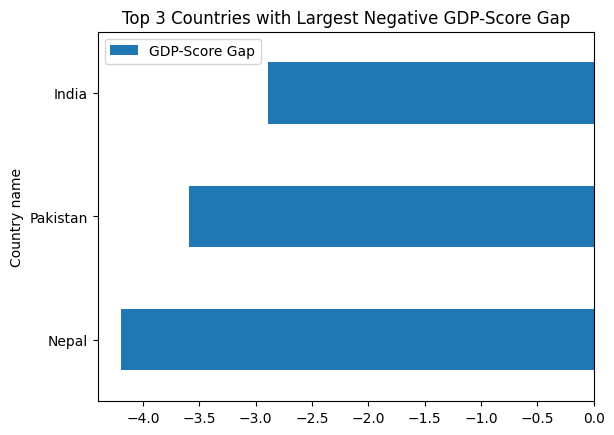

In [19]:
south_asia['GDP-Score Gap'] = south_asia['Log GDP per capita'] - south_asia['score']

rank_gdp_score_gap = south_asia.sort_values(by='GDP-Score Gap', ascending=False)
rank_gdp_score_gap_asc = south_asia.sort_values(by='GDP-Score Gap', ascending=True)
top_three_countries = rank_gdp_score_gap.head(3)

top_three_countries_plot = top_three_countries.plot(kind='barh', x='Country name', y='GDP-Score Gap', title='Top 3 Countries with Largest Positive GDP-Score Gap')

largest_negative_gaps = rank_gdp_score_gap_asc.head(3)
largest_negative_gaps_plot = largest_negative_gaps.plot(kind='barh', x='Country name', y='GDP-Score Gap', title='Top 3 Countries with Largest Negative GDP-Score Gap')

print(rank_gdp_score_gap.head(10))
print(rank_gdp_score_gap_asc.head(10))

In [20]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
middle_east_csv = whr_data[whr_data['Country name'].isin(middle_east_countries)]
middle_east_csv.to_csv('middle_east_countries.csv')

middle_east_data = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')



mean_score_middle_east  = middle_east_data['score'].mean()
mean_score_south_asia = south_asia['score'].mean()
print(f"The mean score of middle east countries is:{mean_score_middle_east:.2f}")
print(f"The mean score of south asia countries is:{mean_score_south_asia:.2f}")
if mean_score_middle_east > mean_score_south_asia:
  print(f"Middle East countries have a higher mean score than South Asia countries\nMiddle East Score:{mean_score_middle_east:.2f}")
else:
  print(f"South Asia countries have a higher mean score than Middle East countries.{mean_score_south_asia:.2f}")

std_middle_east = middle_east_data['score'].std()
std_south_asia = south_asia['score'].std()
print(f"The standard deviation of middle east countries is:{std_middle_east:.2f}")
print(f"The standard deviation of south asia countries is:{std_south_asia:.2f}")

The mean score of middle east countries is:5.53
The mean score of south asia countries is:3.90
Middle East countries have a higher mean score than South Asia countries
Middle East Score:5.53
The standard deviation of middle east countries is:1.17
The standard deviation of south asia countries is:1.32


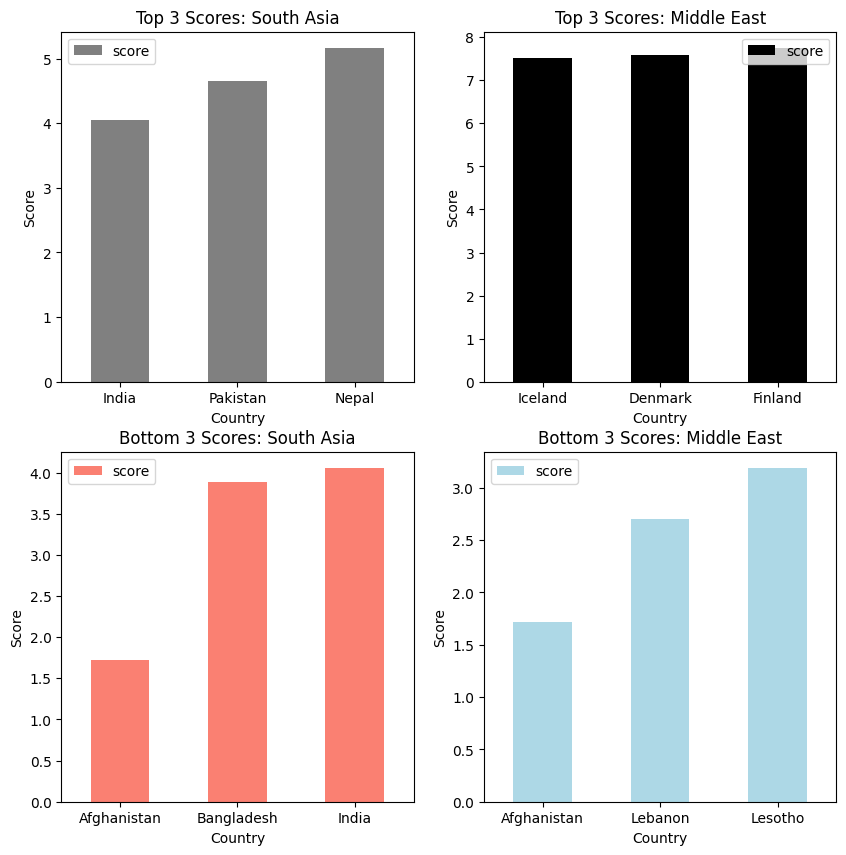

<Figure size 1000x600 with 0 Axes>

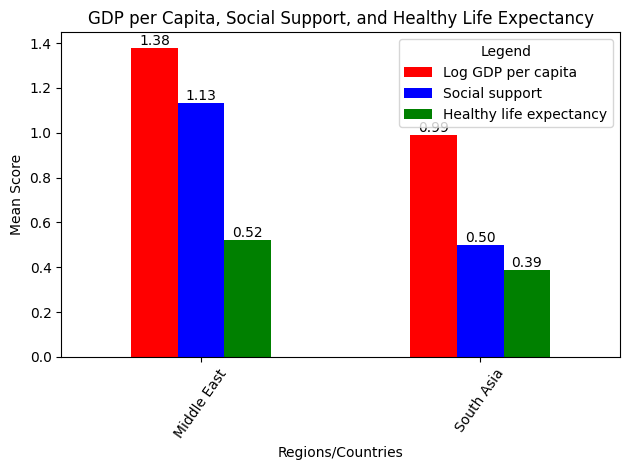

In [29]:
south_asia_bottom3 = south_asia.sort_values(by='score').head(3)
south_asia_top3 = south_asia.sort_values(by='score').tail(3)

middle_east_bottom3 = middle_east_data.sort_values(by='score').head(3)
middle_east_top3 = middle_east_data.sort_values(by='score').tail(3)

#Top 3 bar chart

fig, axes = plt.subplots(2, 2,figsize=(10,10))
south_asia_top3.plot(kind='bar', x='Country name', y='score', ax=axes[0, 0], color='gray')
axes[0, 0].set_title('Top 3 Scores: South Asia')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=360)

middle_east_top3.plot(kind='bar', x='Country name', y='score', ax=axes[0, 1], color='black')
axes[0, 1].set_title('Top 3 Scores: Middle East')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(),rotation=360)

south_asia_bottom3.plot(kind='bar', x='Country name', y='score', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Bottom 3 Scores: South Asia')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=360)

middle_east_bottom3.plot(kind='bar', x='Country name', y='score', ax=axes[1, 1], color='lightblue')
axes[1, 1].set_title('Bottom 3 Scores: Middle East')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=360)




combined_data = pd.concat([
    south_asia.assign(Region='South Asia'),
    middle_east_data.assign(Region='Middle East')
])
combined_data = combined_data[['Log GDP per capita','Social support','Healthy life expectancy','Region']]

pivot_data = combined_data.groupby('Region').mean()
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = pivot_data.plot(kind='bar', legend=False,color=['Red', 'Blue', 'Green'])
plt.legend(title='Legend', loc='upper right')
plt.title('GDP per Capita, Social Support, and Healthy Life Expectancy')
plt.xlabel('Regions/Countries')
plt.ylabel('Mean Score')
plt.xticks(rotation=55)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
plt.show()

In [22]:
south_asia_variability = south_asia['score'].max()-south_asia['score'].min()
middle_east_variability = middle_east_data['score'].max()-middle_east_data['score'].min()

CV_south_asia = south_asia['score'].std()/south_asia['score'].mean()
CV_middle_east = middle_east_data['score'].std()/middle_east_data['score'].mean()

print(f"The variability of South Asia is:{south_asia_variability:.2f}")
print(f"The variability of Middle East is:{middle_east_variability:.2f}")
print(f"The coefficient of variation of South Asia is:{CV_south_asia:.2f}")
print(f"The coefficient of variation of Middle East is:{CV_middle_east:.2f}")

The variability of South Asia is:3.44
The variability of Middle East is:6.02
The coefficient of variation of South Asia is:0.34
The coefficient of variation of Middle East is:0.21


The correlation between Freedom to make life choices and score is: 0.80
The correlation between Generosity and score is: 0.88
The correlation between Freedom to make life choices and score is: 0.64
The correlation between Generosity and score is: 0.13


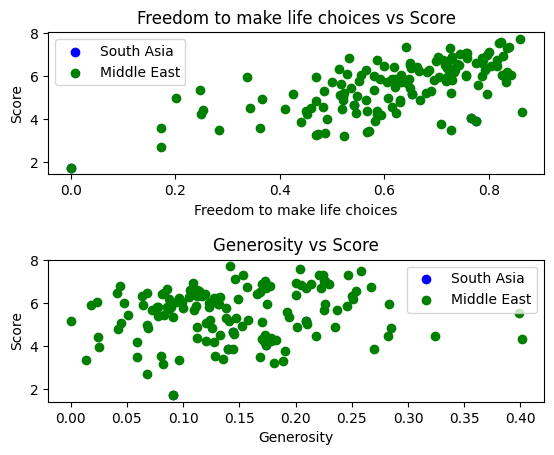

In [30]:
corr_life_choices_south_asia = south_asia['Freedom to make life choices'].corr(south_asia['score'],method='pearson')
corr_generosity_south_asia = south_asia['Generosity'].corr(south_asia['score'],method = 'pearson')

print(f"The correlation between Freedom to make life choices and score is: {corr_life_choices_south_asia:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity_south_asia:.2f}")


corr_life_choices_middle_east = middle_east_data['Freedom to make life choices'].corr(middle_east_data['score'],method='pearson')
corr_generosity_middle_east = middle_east_data['Generosity'].corr(middle_east_data['score'],method = 'pearson')
print(f"The correlation between Freedom to make life choices and score is: {corr_life_choices_middle_east:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity_middle_east:.2f}")
#scatter plot the combined data with different labels for each
plt.subplot(2, 1, 1)
plt.scatter(south_asia['Freedom to make life choices'], south_asia['score'], label='South Asia', color='blue')
plt.scatter(middle_east_data['Freedom to make life choices'], middle_east_data['score'], label='Middle East', color='green')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.title('Freedom to make life choices vs Score')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(south_asia['Generosity'], south_asia['score'], label='South Asia', color='blue')
plt.scatter(middle_east_data['Generosity'], middle_east_data['score'], label='Middle East', color='green')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Generosity vs Score')
plt.subplots_adjust(hspace=0.6)
plt.legend()
plt.show()

  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628             0.0   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                           0.0       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
4                      0.088                0.672                Low   

   Composite Score  GDP-Score Gap      Region  
4           0.3238         -1.093  South Asia  
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual       Region  
142                      0.088                0.672  Middle East  
  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.72

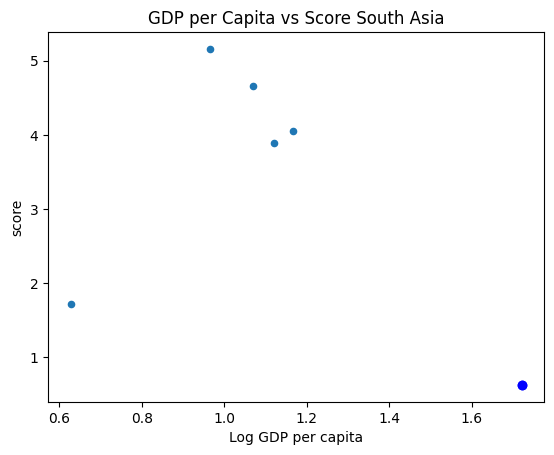

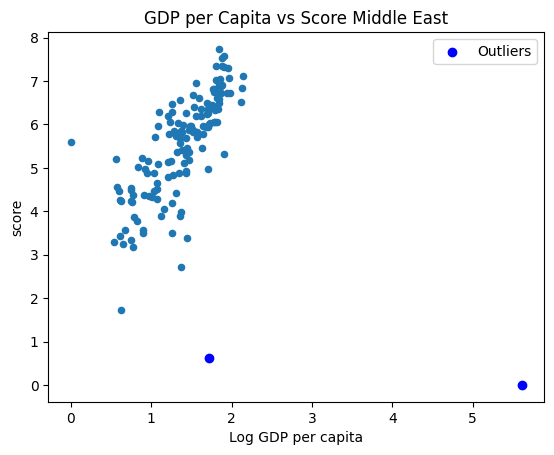

In [31]:
def find_outliers_south_asia(column_name):
    Q1 = south_asia[column_name].quantile(0.25)
    Q3 = south_asia[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia[(south_asia[column_name] < lower_bound) | (south_asia[column_name] > upper_bound)]
def find_outliers_middle_east(column_name):
    Q1 = middle_east_data[column_name].quantile(0.25)
    Q3 = middle_east_data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return middle_east_data[(middle_east_data[column_name]<lower_bound) | (middle_east_data[column_name]>upper_bound)]
if find_outliers_south_asia('score').empty:
  print("No Outliers")
else:
  print(find_outliers_south_asia('score'))

if find_outliers_middle_east('score').empty:
  print("No Outliers")
else:
  print(find_outliers_middle_east('score'))

if find_outliers_south_asia('Log GDP per capita').empty:
  print("No Outliers")
else:
  print(find_outliers_south_asia('Log GDP per capita'))

if find_outliers_middle_east('Log GDP per capita').empty:
  print("No Outliers")
else:
  print(find_outliers_middle_east('Log GDP per capita'))

#Plotting the outliers for each region
south_asia_normal_plot = south_asia.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score South Asia')
middle_east_normal_plot = middle_east_data.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score Middle East')
outliers_south_asia = pd.concat([find_outliers_south_asia('score'), find_outliers_south_asia('Log GDP per capita')])
outliers_middle_east = pd.concat([find_outliers_middle_east('score'), find_outliers_middle_east('Log GDP per capita')])
south_asia_normal_plot.scatter(outliers_south_asia['score'], outliers_south_asia['Log GDP per capita'], color='blue', label='Outliers')
middle_east_normal_plot.scatter(outliers_middle_east['score'], outliers_middle_east['Log GDP per capita'], color='blue', label='Outliers')
plt.legend()


<Figure size 800x600 with 0 Axes>

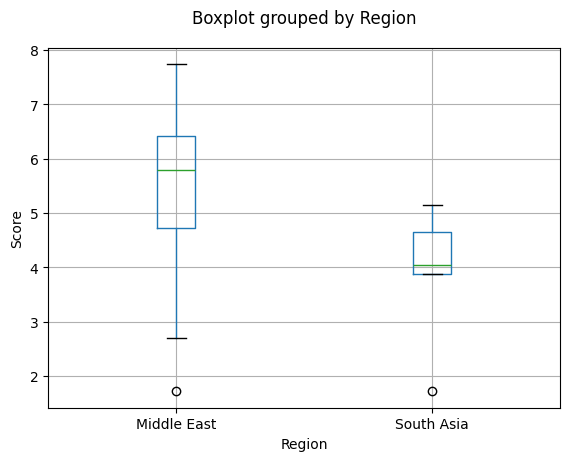

In [25]:
#Box plot for comparing Score between South Asia and Middle East

south_asia['Region'] ='South Asia'
middle_east_data['Region'] = 'Middle East'
combined_data = pd.concat([south_asia, middle_east_data])
plt.figure(figsize=(8, 6))
combined_data.boxplot(column='score',by='Region')
plt.title('')
plt.ylabel('Score')
plt.show()